# Best Fit Analysis

### Import necessary modules

In [44]:
import matplotlib.pyplot as plt
import math
import numpy as np

### Plot data and draw line of best fit
#### Output slope, y-intercept, and root mean square

In [45]:
def fit(data, draw_fit=False, trash_bad_data=False):

    x_data_values = data[:, 0]
    y_data_values = data[:, 1]

    x0 = x_data_values[0]
    xf = x_data_values[len(x_data_values) - 1]

    m = (np.sum(x_data_values * y_data_values - x_data_values * np.mean(y_data_values))) / \
            (np.sum(x_data_values ** 2 - x_data_values * np.mean(x_data_values)))
    b = -m * np.mean(x_data_values) + np.mean(y_data_values)

    chi_squared = sum((y_data_values - m * x_data_values - b) ** 2)
    sigma = np.sqrt((chi_squared) / (len(x_data_values) - 2))
    
    if trash_bad_data:
        i = 0
        while i < len(x_data_values):
            if np.fabs(y_data_values[i] - (m * x_data_values[i] + b)) > (2 * sigma):
                x_data_values = np.delete(x_data_values, i)
                y_data_values = np.delete(y_data_values, i)
            i += 1
            
        m = (np.sum(x_data_values * y_data_values - x_data_values * np.mean(y_data_values))) / \
            (np.sum(x_data_values ** 2 - x_data_values * np.mean(x_data_values)))
        b = -m * np.mean(x_data_values) + np.mean(y_data_values)

        chi_squared = sum((y_data_values - m * x_data_values - b) ** 2)
        sigma = np.sqrt((chi_squared) / (len(x_data_values) - 2))

    if draw_fit:
        plt.plot([x0, xf], [m * x0 + b, m * xf + b])

        plt.scatter(x_data_values, y_data_values)
        plt.show()
    
    return (m, b, sigma)

In [46]:
table = np.array([[1.1, 72.61], \
                  [1.6, 72.91], \
                  [2.0, 73.00], \
                  [2.1, 73.11], \
                  [2.9, 73.52], \
                  [3.2, 73.70], \
                  [3.3, 76.10], \
                  [4.4, 74.26], \
                  [4.9, 74.51]])

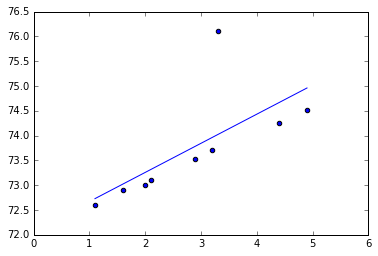

(0.58714953271027703, 72.083076323987555, 0.84229954570781596)

In [47]:
fit(table, draw_fit=True, trash_bad_data=False)

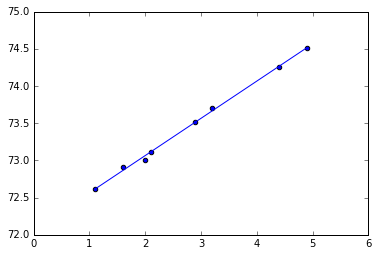

(0.50047637951568369, 72.063678046843975, 0.035583567656307241)

In [48]:
fit(table, draw_fit=True, trash_bad_data=True)

### Interpolate Data

In [49]:
def interpolate(data, x_value):
    m, b, sigma = fit(data)
    y_value = m * x_value + b
    
    return y_value

In [50]:
interpolate(table, 3.5)

74.138099688473531